 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Set the file path
whale_returns_path=Path("whale_returns.csv")

# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [7]:
# Generating a sample to ensure data loaded correctly
whale_returns_df.head()

# Identifying number of rows and columns in data
#whale_returns_df.shape

# Identifying the number of records, compared to number of rows in shape
#whale_returns_df.count()
#whale_returns_df.count()/len(whale_returns_df)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
# Count nulls
#whale_returns_df.isnull()
whale_returns_df.isnull().mean()

SOROS FUND MANAGEMENT LLC      0.000943
PAULSON & CO.INC.              0.000943
TIGER GLOBAL MANAGEMENT LLC    0.000943
BERKSHIRE HATHAWAY INC         0.000943
dtype: float64

In [9]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

In [10]:
# Checking that its dropped null values
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Set the file path
algo_returns_path=Path("algo_returns.csv")

# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [12]:
# Generating a sample to ensure data loaded correctly
algo_returns_df.head()

# Identifying number of rows and columns in data
#algo_returns_df.shape

# Identifying the number of records, compared to number of rows in shape
#algo_returns_df.count()
#algo_returns_df.count()/len(algo_returns_df)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [13]:
# Count nulls
algo_returns_df.isnull().mean()

Algo 1    0.000000
Algo 2    0.004835
dtype: float64

In [14]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

In [15]:
# Checking that its dropped null values
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Set the file path
sp500_history_path=Path("sp500_history.csv")

# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(sp500_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [17]:
# Generating a sample to ensure data loaded correctly
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [18]:
# Checking for null values
sp500_history_df.isnull().mean() # no null values to drop

Close    0.0
dtype: float64

In [19]:
# Check Data Types
sp500_history_df['Close'].head()

Date
2019-04-23    $2933.68
2019-04-22    $2907.97
2019-04-18    $2905.03
2019-04-17    $2900.45
2019-04-16    $2907.06
Name: Close, dtype: object

In [20]:
# Fix Data Types
# Replacing dollar signs with no dollar signs
sp500_history_df['Close']= sp500_history_df['Close'].str.replace('$', '')
#Checking if that worked
sp500_history_df['Close']
# Checking data type of Close
sp500_history_df['Close'].dtype

<ipython-input-20-bebb6afc90eb>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history_df['Close']= sp500_history_df['Close'].str.replace('$', '')


dtype('O')

In [21]:
# Casting close as a float variable
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [22]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [23]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns =["S&P 500"]
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_returns_df.head() #looks like return-dataframe.png

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for all Portfolios'}, xlabel='Date'>

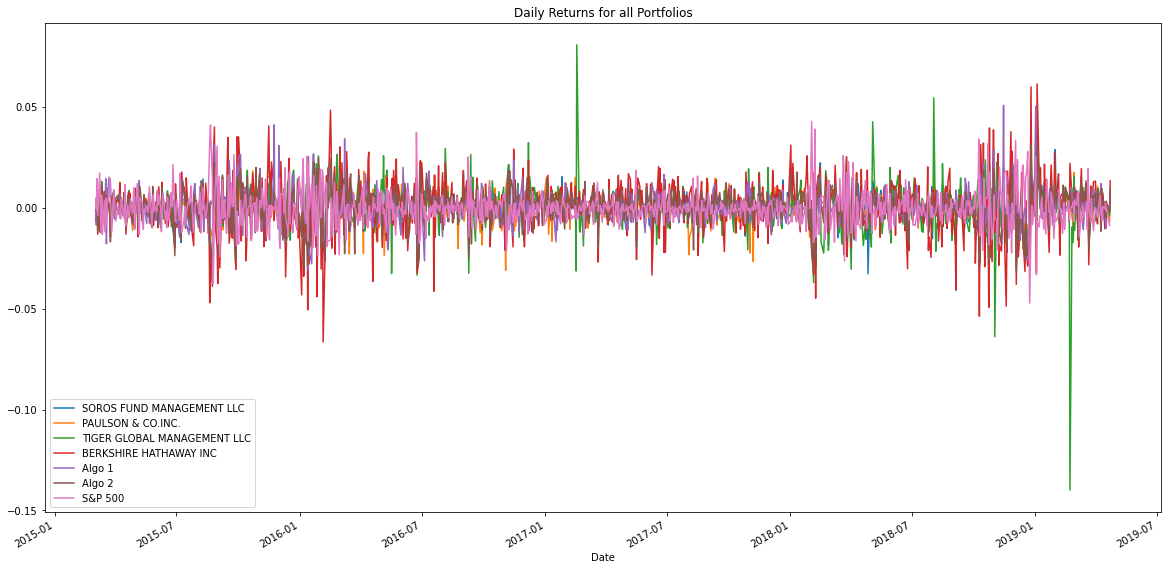

In [25]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10), title='Daily Returns for all Portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for all Portfolios'}, xlabel='Date'>

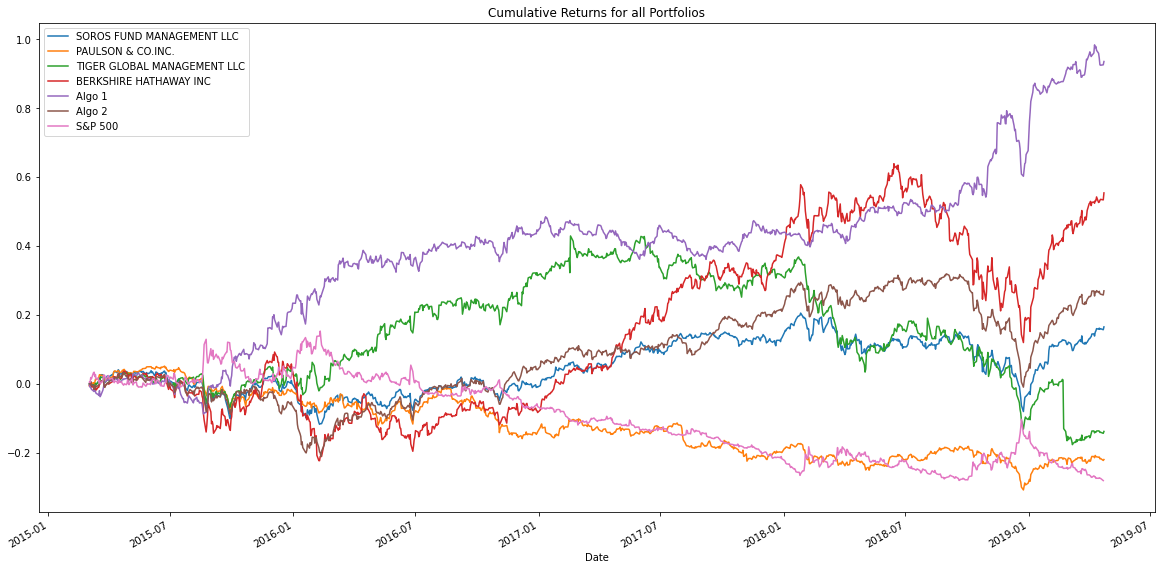

In [26]:
# Calculate cumulative returns of all portfolios
# Used the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + combined_returns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns for all Portfolios')

<AxesSubplot:xlabel='Date'>

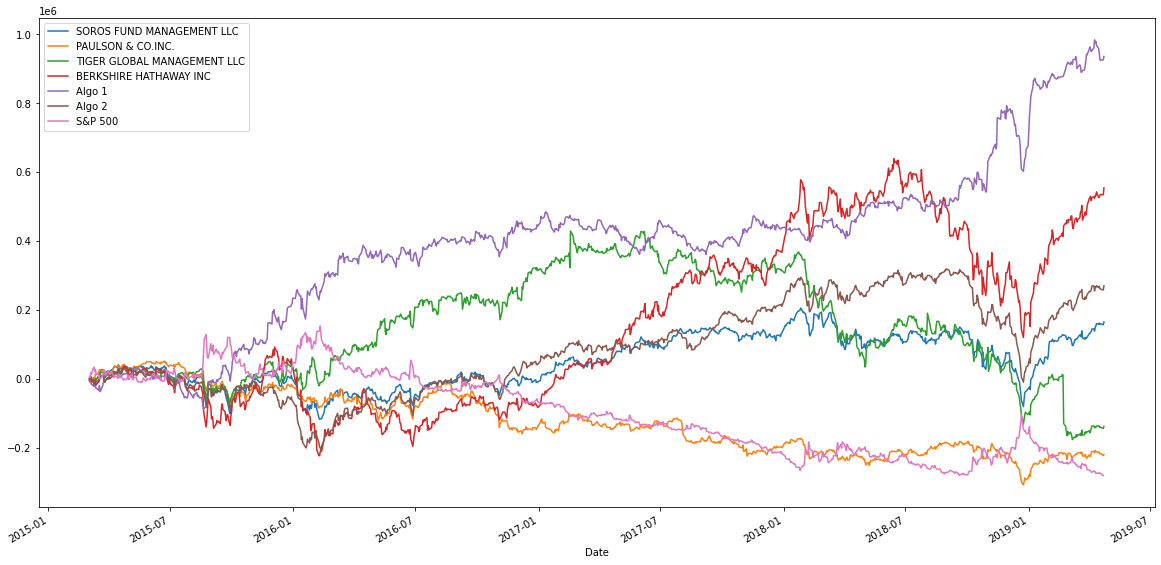

In [27]:
# Out of interest, plotted returns of all portfolio if intial investment was $1 million
intial_investment = 1000000
cumulative_profit = intial_investment *cumulative_returns
cumulative_profit.plot(figsize=(20,10)) # Graphs look the same, since multiplying them all by the same initial investment

In [28]:
## Portfolios that outperform the SP500:
    # Algo Portfolio
    # Whale portfolio, except for Paulson & Co inc. at times

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Returns Box Plot'}>

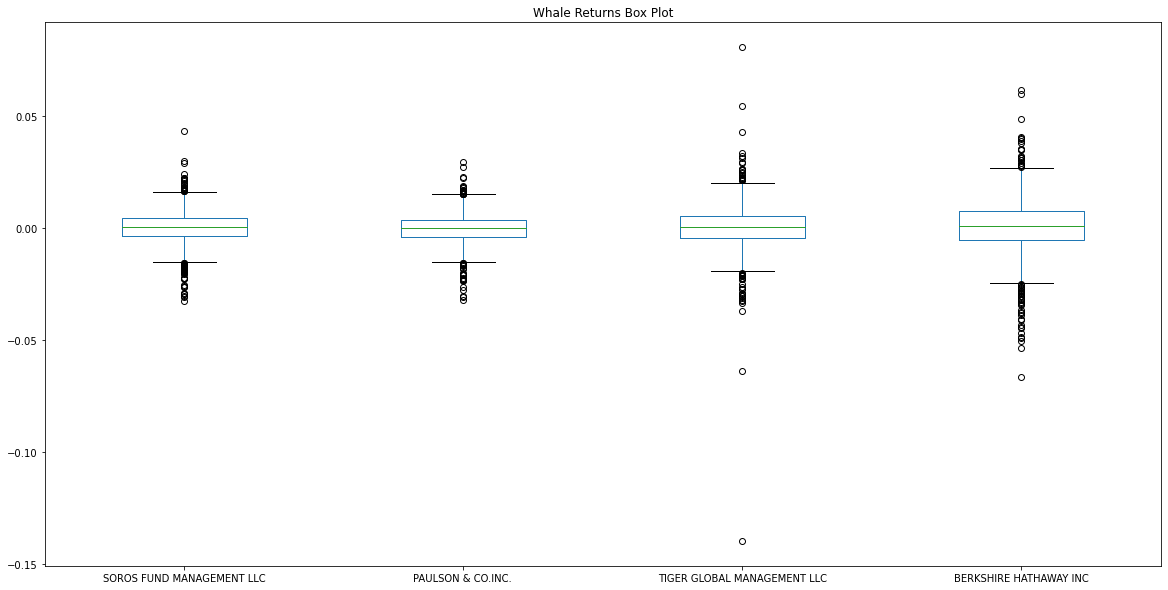

In [29]:
# Box plot to visually show risk
# whale returns box plot
whale_returns_df.plot(kind='box', title = 'Whale Returns Box Plot', figsize=(20,10))

<AxesSubplot:title={'center':'Algo Returns Box Plot'}>

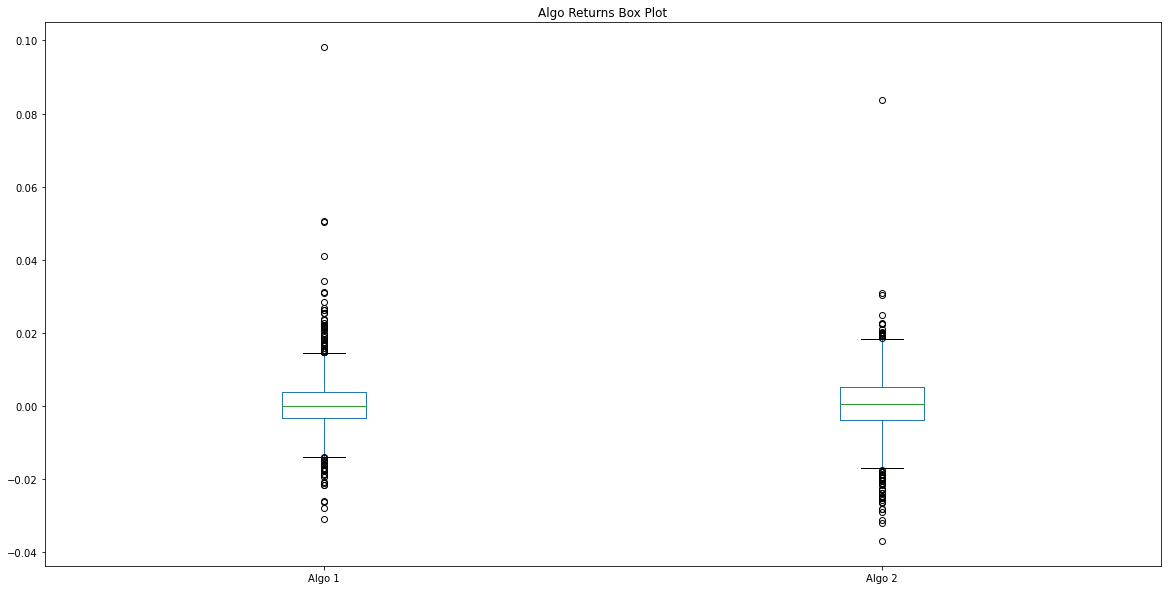

In [30]:
# Algo returns box plot
algo_returns_df.plot(kind='box', title = 'Algo Returns Box Plot', figsize=(20,10))

<AxesSubplot:title={'center':'SP500 Box Plot'}>

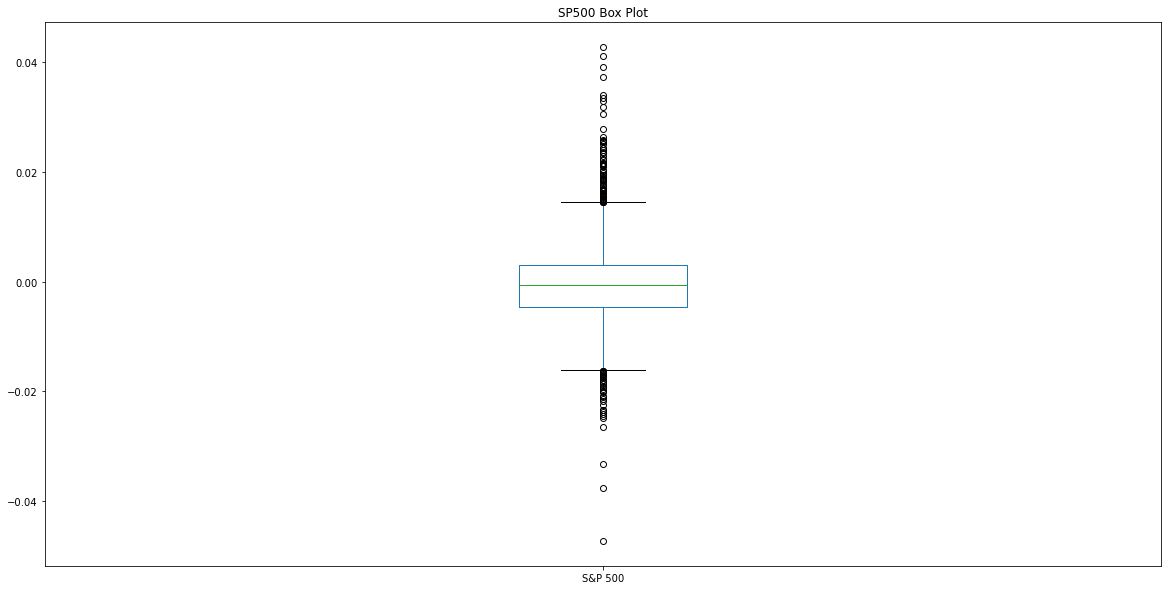

In [31]:
# SP500 returns box plot
sp500_daily_returns.plot(kind='box', title = 'SP500 Box Plot', figsize=(20,10))

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_returns_df.std()

### Determine which portfolios are riskier than the S&P 500

In [33]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
volatility.sort_values(inplace=True)
print (volatility)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [34]:
# Tiger Global Management LLC and Berkshire Hathway are riskier/more volatile than S&P 500.

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
volatility_annualised = combined_returns_df.std()* np.sqrt(252)
print(volatility_annualised)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.136313
dtype: float64


In [36]:
# When annualised, we see that no portfolios are riskier/more volatile than the S&P 500

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Std Deviation for all portfolios (21 day window)'}, xlabel='Date'>

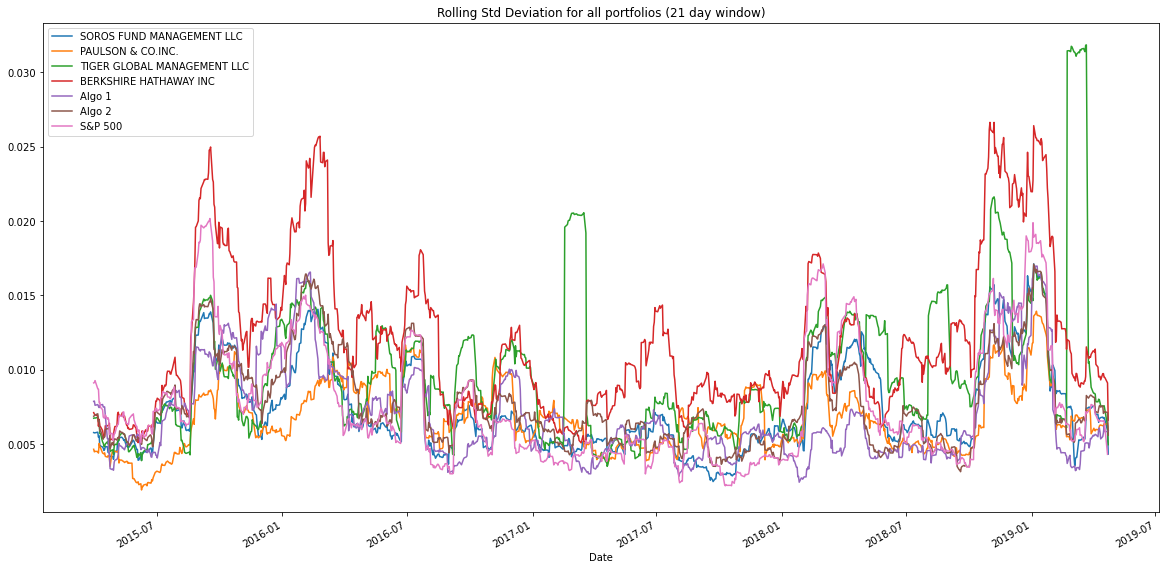

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_df_std_21 = combined_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns_df_std_21.plot(figsize=(20,10), title='Rolling Std Deviation for combined portfolios (21 day window)')

### Calculate and plot the correlation

In [38]:
# Calculate the correlation
correlation = combined_returns_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:>

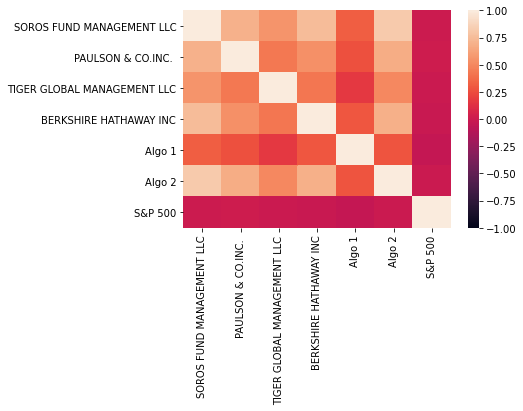

In [39]:
# Correlation heatmap out of curiosity
sns.heatmap(correlation, vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Rolling Beta for Berkshire compared to S&P 500, rolling window=60days'}, xlabel='Date'>

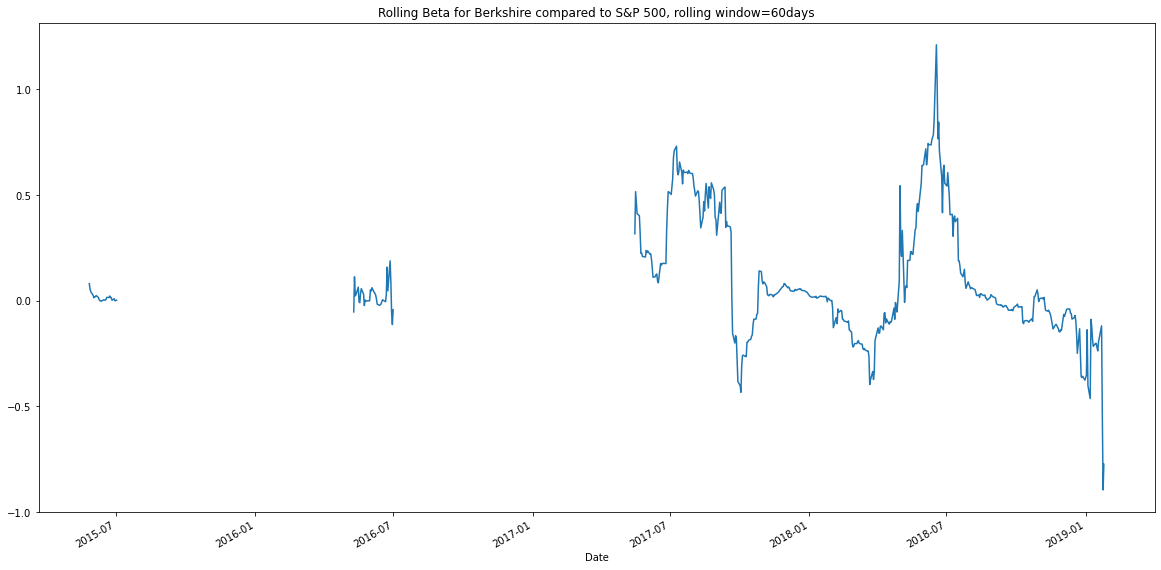

In [40]:
# Calculate covariance of a single portfolio
Berkshire_covariance=whale_returns_df['BERKSHIRE HATHAWAY INC'].cov(sp500_daily_returns['S&P 500'])

# Calculate variance of S&P 500
variance = sp500_daily_returns['S&P 500'].var()

# Computing beta
Berkshire_beta = Berkshire_covariance/variance

# Plot beta trend for 60 day rolling beta
rolling_Berkshire_covariance = whale_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(sp500_daily_returns['S&P 500'])
rolling_variance = sp500_daily_returns['S&P 500'].rolling(window=60).var()
rolling_Berkshire_beta = rolling_Berkshire_covariance / rolling_variance
rolling_Berkshire_beta.plot(figsize=(20,10), title='Rolling Beta for Berkshire compared to S&P 500, rolling window=60days')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

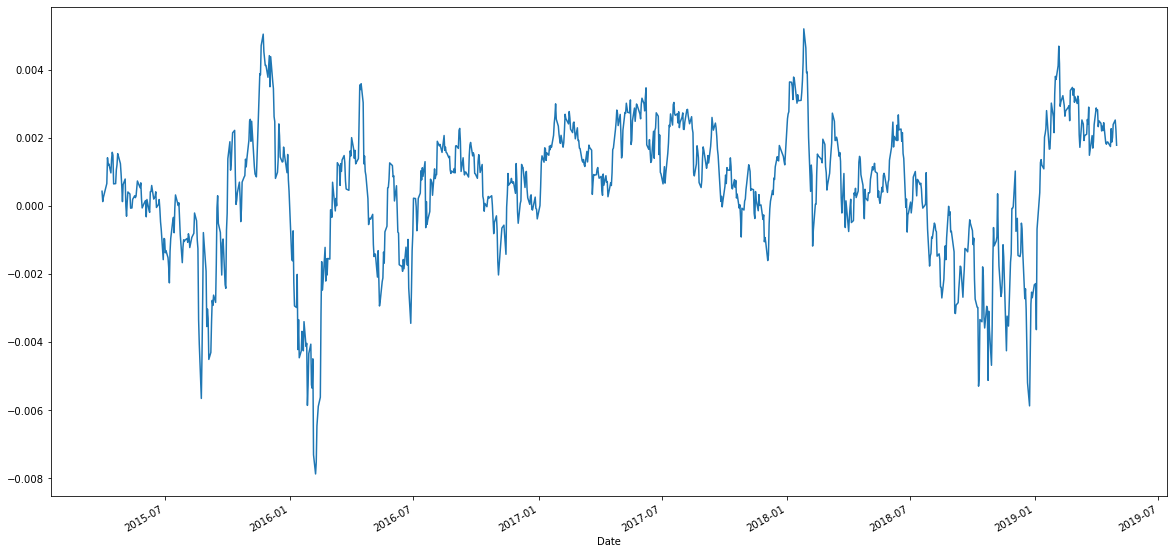

In [153]:
# Use `ewm` to calculate the rolling window
rolling_ewm = whale_returns_df['BERKSHIRE HATHAWAY INC'].ewm(com = 21,min_periods=21).mean()
# Don't fully understand half-life and significance of alpha, will need to ask in class time
rolling_ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [103]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios annualised for each portfolio'}>

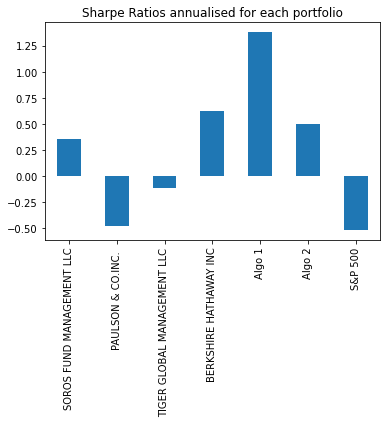

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios annualised for each portfolio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [44]:
# Based on the Sharpe ratios, Algo 1 has the best return relative to risk, annualised.
# Algo 1 is also less riskier than the S&P 500 both when annualised and not annualised.
# Algo 2 has a lower Sharpe ratio than Berkshire when annulaised, but is less volatilie when looking at annalised standard deviations.
# Algo 1 is more correlated to whale portfolio than Algo 2.
# Overall, based on Sharpe ratios, Algo portfolio outperforms the S&P 500 and whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [70]:
# Reading data from 1st stock
# Set the file path
tlsa_history_path=Path("tsla_history.csv")

# Reading tsla returns
tsla_df = pd.read_csv(tlsa_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Generating a sample to ensure data loaded correctly
tsla_df.index=tsla_df.index.date
tsla_df.head()


,Close
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78
2015-03-09,38.18


In [71]:
# Reading data from 2nd stock
# Set the file path
wmt_history_path=Path("wmt_history.csv")

# Reading wmt returns
wmt_df = pd.read_csv(wmt_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Generating a sample to ensure data loaded correctly
wmt_df.index=wmt_df.index.date
wmt_df.head()

,Close
2015-03-03,83.37
2015-03-04,82.58
2015-03-05,83.57
2015-03-06,82.59
2015-03-09,82.88


In [72]:
# Reading data from 3rd stock
# Set the file path
rmd_history_path=Path("rmd_history.csv")

# Reading rmd returns
rmd_df = pd.read_csv(rmd_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
# Generating a sample to ensure data loaded correctly
rmd_df.index=rmd_df.index.date
rmd_df.head()

,Close
2015-03-03,64.49
2015-03-04,64.84
2015-03-05,65.71
2015-03-06,65.85
2015-03-09,67.30


In [73]:
#Checking for nulls
print (tsla_df.isnull().mean())
print (wmt_df.isnull().mean())
print (rmd_df.isnull().mean())

Close    0.0
dtype: float64
Close    0.0
dtype: float64
Close    0.0
dtype: float64


In [74]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([tsla_df, wmt_df, rmd_df], axis="columns", join="inner")
my_portfolio.head()

,Close,Close,Close
2015-03-03,39.91,83.37,64.49
2015-03-04,40.49,82.58,64.84
2015-03-05,40.13,83.57,65.71
2015-03-06,38.78,82.59,65.85
2015-03-09,38.18,82.88,67.30


In [75]:
# Reset Date index
my_portfolio.reset_index().head()

,index,Close,Close,Close
0,2015-03-03,39.91,83.37,64.49
1,2015-03-04,40.49,82.58,64.84
2,2015-03-05,40.13,83.57,65.71
3,2015-03-06,38.78,82.59,65.85
4,2015-03-09,38.18,82.88,67.30


In [76]:
# Reorganize portfolio data by having a column per symbol
col_names = ["TSLA", "WMT", "RMD"]
my_portfolio.columns = col_names
my_portfolio.head()

,TSLA,WMT,RMD
2015-03-03,39.91,83.37,64.49
2015-03-04,40.49,82.58,64.84
2015-03-05,40.13,83.57,65.71
2015-03-06,38.78,82.59,65.85
2015-03-09,38.18,82.88,67.30


In [77]:
# Calculate daily returns
my_portfolio_daily_returns = my_portfolio.pct_change()
# Drop NAs
my_portfolio_daily_returns = my_portfolio_daily_returns.dropna()
# Display sample data
my_portfolio_daily_returns.head()

,TSLA,WMT,RMD
2015-03-04,0.014533,-0.009476,0.005427
2015-03-05,-0.008891,0.011988,0.013418
2015-03-06,-0.033641,-0.011727,0.002131
2015-03-09,-0.015472,0.003511,0.022020
2015-03-10,-0.003143,-0.009773,-0.015156


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [78]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_weighted = my_portfolio_daily_returns.dot(weights) # weighted index price for specific date

# Display sample data
my_portfolio_weighted.head()

2015-03-04    0.003495
2015-03-05    0.005505
2015-03-06   -0.014412
2015-03-09    0.003353
2015-03-10   -0.009357
dtype: float64

In [79]:
type(my_portfolio_weighted)

pandas.core.series.Series

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [80]:
# Join your returns DataFrame to the original returns DataFramea
all_portfolios = pd.concat([my_portfolio_weighted, combined_returns_df], axis="columns", join="outer")

In [97]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios = all_portfolios.dropna()
all_portfolios.rename(columns={0:'My_Portfolio'}, inplace=True)
all_portfolios.head()

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2015-03-04,0.003495,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.005505,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.014412,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.003353,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.009357,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized `std`
all_portfolios_volatility = all_portfolios.std()* np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Std Deviation for all portfolios (21 day window)'}>

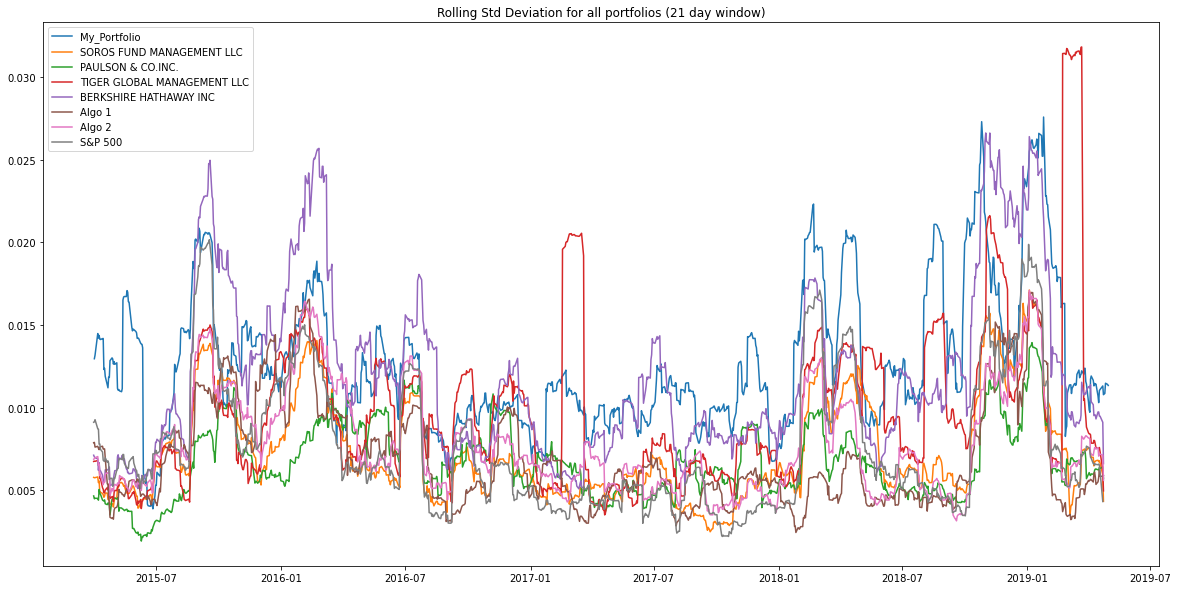

In [88]:
# Calculate rolling standard deviation
all_portfolios_std_21 = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
all_portfolios_std_21.plot(figsize=(20,10), title='Rolling Std Deviation for all portfolios (21 day window)')

### Calculate and plot the correlation

<AxesSubplot:>

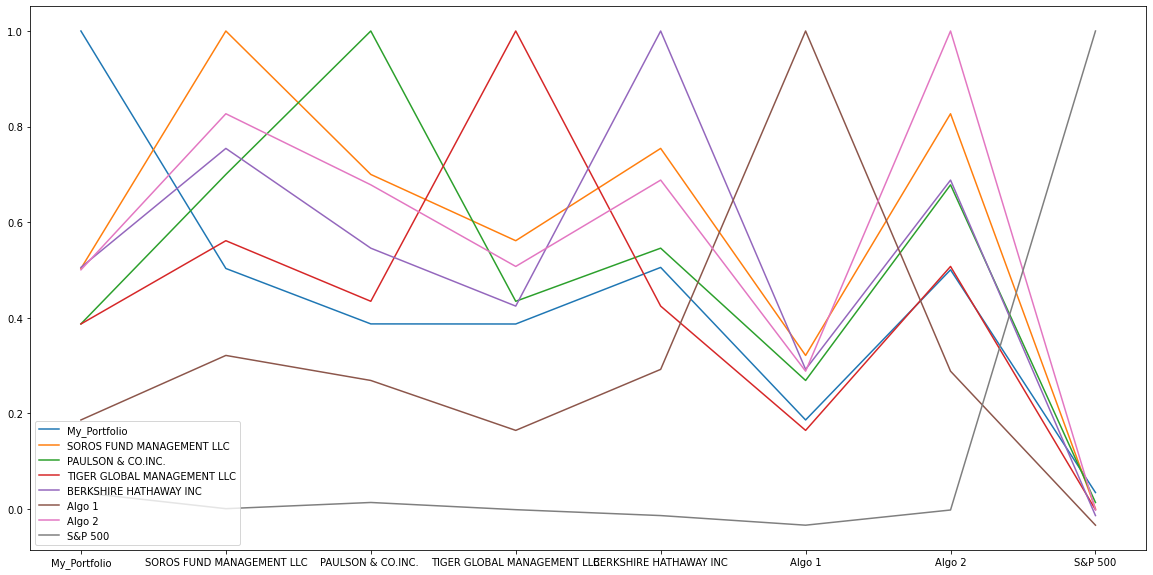

In [96]:
# Calculate and plot the correlation
correlation_all = all_portfolios.corr()
correlation_all.plot(figsize=(20,10))

<AxesSubplot:>

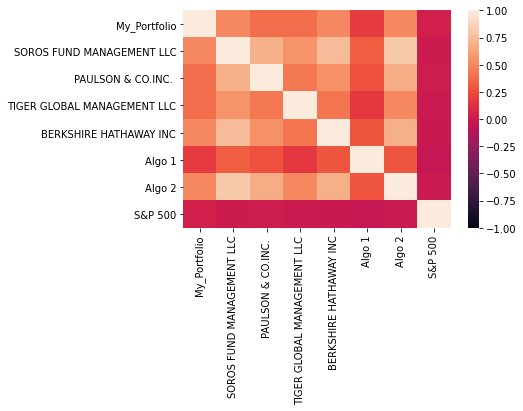

In [137]:
sns.heatmap(correlation_all, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta for My Portfolio compared to S&P 500, rolling window=60days'}>

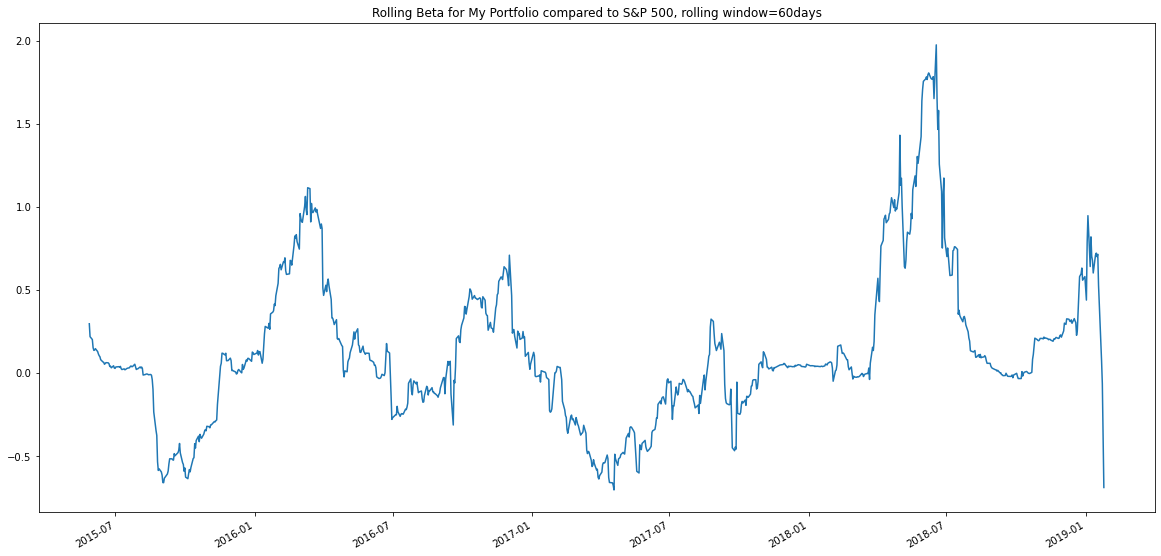

In [140]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
my_portfolio_covariance=my_portfolio_weighted.cov(sp500_daily_returns['S&P 500'])

# Calculate variance of S&P 500
variance = sp500_daily_returns['S&P 500'].var()

# Computing beta
my_portfolio_beta = my_portfolio_covariance/variance

# Plot beta trend for 60 day rolling beta
rolling_my_portfolio_covariance = my_portfolio_weighted.rolling(window=60).cov(sp500_daily_returns['S&P 500'])
rolling_variance = sp500_daily_returns['S&P 500'].rolling(window=60).var()
rolling_my_portfolio_beta = rolling_my_portfolio_covariance / rolling_variance
rolling_my_portfolio_beta.plot(figsize=(20,10), title='Rolling Beta for My Portfolio compared to S&P 500, rolling window=60days')

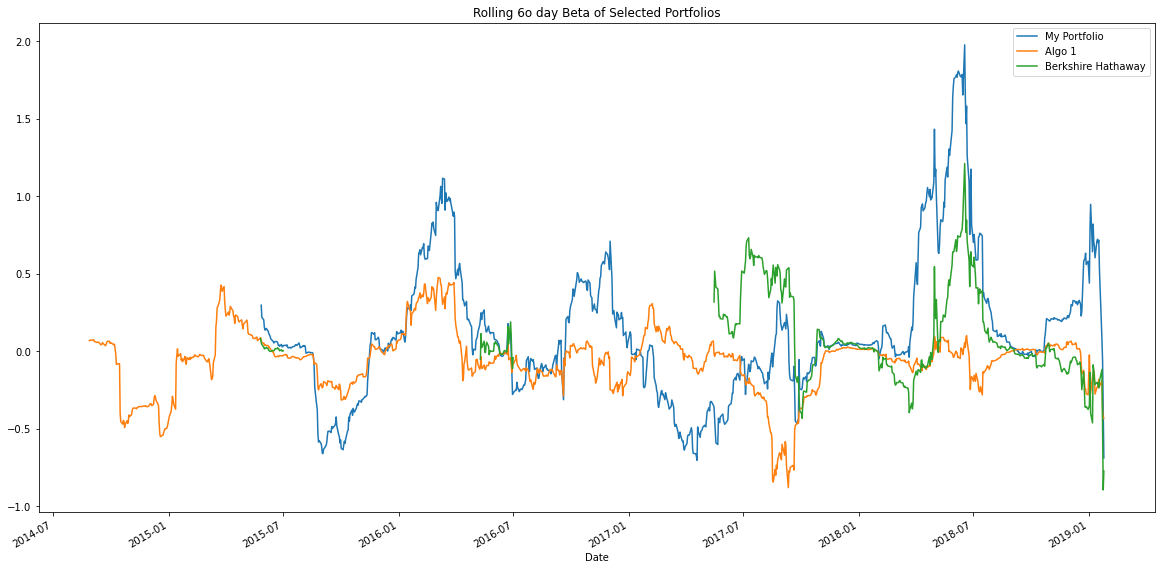

In [145]:
# Out of curiosity, comparing rolling Beta of My Portfolio to two stocks which had the best sharpe ratios - Algo 1 and Berkshire Hathaway
# Calculate Algo 1 beta for 60 day window
rolling_algo1_covariance = algo_returns_df['Algo 1'].rolling(window=60).cov(sp500_daily_returns['S&P 500'])
rolling_algo1_beta = rolling_algo1_covariance /rolling_variance

# Plot My Portfolio, Algo 1 and Berkshire Hathaway rolling beta for 60 day window
ax = rolling_my_portfolio_beta.plot(figsize =(20,10), title = 'Rolling 60 day Beta of Selected Portfolios')
rolling_algo1_beta.plot(ax=ax)
rolling_Berkshire_beta.plot(ax=ax)

# set legend
ax.legend(["My Portfolio", "Algo 1", "Berkshire Hathaway"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [119]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sorted_sharpe_ratios = sharpe_ratios.sort_values()
sorted_sharpe_ratios

S&P 500                       -0.526730
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
SOROS FUND MANAGEMENT LLC      0.345506
Algo 2                         0.486307
My_Portfolio                   0.595534
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
dtype: float64

In [121]:
Algo_1_Sharpe = sorted_sharpe_ratios['Algo 1']

In [122]:
My_Portfolio_Sharpe = sorted_sharpe_ratios['My_Portfolio']

<AxesSubplot:title={'center':'Sharpe Ratios annualised for My Portfolio'}>

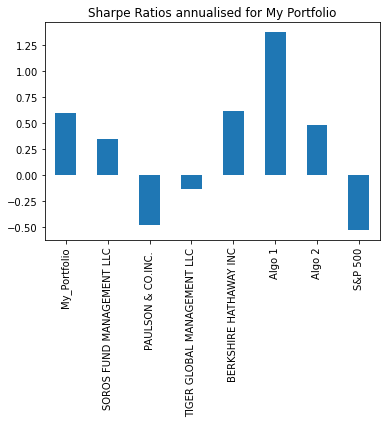

In [99]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios annualised for My Portfolio')

### How does your portfolio do?

Write your answer here!

My Portfolio is most correlated to Soros Fund Management LLC, Berkshire Hathaway Inc and Algo 2, as observed by the correlation heatmap AxesSubplot(0.125,0.125;0.62x0.755)


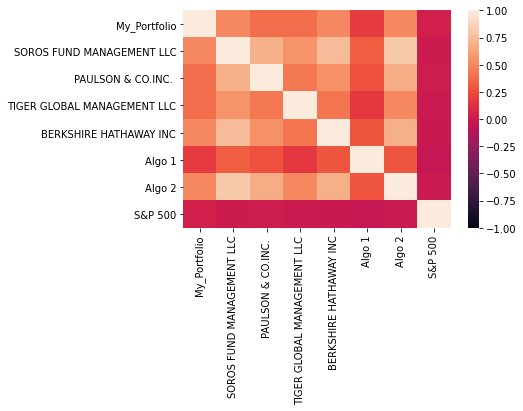

In [136]:
print (f'My Portfolio is most correlated to Soros Fund Management LLC, Berkshire Hathaway Inc and Algo 2, as observed by the correlation heatmap {sns.heatmap(correlation_all, vmin=-1, vmax=1)}')

In [130]:
print (f'Based on the Sharpe ratios, Algo 1 still has the best return relative to risk with a sharpe ratio of {Algo_1_Sharpe} as compared to My Portfolio of sharpe ratio {My_Portfolio_Sharpe}')

Based on the Sharpe ratios, Algo 1 still has the best return relative to risk with a sharpe ratio of 1.3742062524925664 as compared to My Portfolio of sharpe ratio 0.5955340701092623


In [129]:
print (f'My Porfolio does relatively well compared to the other portfolios when the Sharpe ratios, which illustrate the risk-return measure, are sorted in ascending value, {sorted_sharpe_ratios}')

My Porfolio does relative well compared to the other portfolios when the Sharpe ratios, which illustrate the risk-return measure, are sorted in ascending value, S&P 500                       -0.526730
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
SOROS FUND MANAGEMENT LLC      0.345506
Algo 2                         0.486307
My_Portfolio                   0.595534
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
dtype: float64


In [149]:
print (f'In terms of volatility, as compared by looking at the rolling betas over a 60 day window in {ax}, my portfolio is more volatile in 2017/2018 but otherwise follows a similar volatility to the two stocks with the highest Sharpe ratios')

In terms of volatility, as compared by looking at the rolling betas over a 60 day window in AxesSubplot(0.125,0.2;0.775x0.68)


In [150]:
print ('In conclusion, My Portfolio performs significantly better than the S&P 500 and I would invest in it.')

In conclusion, My Portfolio performs significantly better than the S&P 500 and I would invest in it.
